In [1]:
%matplotlib inline 

import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy.stats import mode
from sklearn.preprocessing import OneHotEncoder
from sympy import *

In [2]:
# Open csv file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data exploration

In [3]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [4]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [5]:
# Check the dataset structure, data types and variables  
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
premium                             79853 non-null int64
renewal                             79853 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 7.9+ MB


In [6]:
# Check missing value
train.apply(lambda x: sum(x.isnull()))

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

In [7]:
# Check the dataset structure, data types and variables  
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 12 columns):
id                                  34224 non-null int64
perc_premium_paid_by_cash_credit    34224 non-null float64
age_in_days                         34224 non-null int64
Income                              34224 non-null int64
Count_3-6_months_late               34193 non-null float64
Count_6-12_months_late              34193 non-null float64
Count_more_than_12_months_late      34193 non-null float64
application_underwriting_score      32901 non-null float64
no_of_premiums_paid                 34224 non-null int64
sourcing_channel                    34224 non-null object
residence_area_type                 34224 non-null object
premium                             34224 non-null int64
dtypes: float64(5), int64(5), object(2)
memory usage: 3.1+ MB


In [8]:
# Check missing value
test.apply(lambda x: sum(x.isnull()))

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
dtype: int64

Note: 
4 variables are impacted by missing values
- 0.001% of values are missing for the 3 variables describing late premium payments, they seem related (train: 97 missing / test: 31 missing) 
- 3.8% of value are missing for underwriting score (train: 2974 missing / test: 1323 missing)

In [9]:
# check duplicate
print(train.duplicated().sum(), train.duplicated(['id']).sum())
print(test.duplicated().sum(), train.duplicated(['id']).sum())

0 0
0 0


In [10]:
# Descriptive statistics on train dataset
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [11]:
# Descriptive statistics on test dataset
test.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium
count,34224.000000,34224.000000,34224.000000,3.422400e+04,34193.000000,34193.000000,34193.000000,32901.000000,34224.000000,34224.000000
mean,56739.956376,0.314457,18824.215346,2.028201e+05,0.238733,0.080718,0.058111,99.061898,10.890428,10834.721248
std,32935.402647,0.334059,5246.525604,2.702536e+05,0.686162,0.454634,0.307046,0.742942,5.216867,9263.074506
min,1.000000,0.000000,7671.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000
25%,28254.750000,0.034000,14972.000000,1.063975e+05,0.000000,0.000000,0.000000,98.800000,7.000000,5400.000000
50%,56488.000000,0.169000,18623.000000,1.650700e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000
75%,85386.250000,0.540000,22636.000000,2.500200e+05,0.000000,0.000000,0.000000,99.530000,14.000000,13800.000000
max,114077.000000,1.000000,35785.000000,2.191455e+07,12.000000,10.000000,7.000000,99.890000,59.000000,60000.000000


## Univariate analysis  

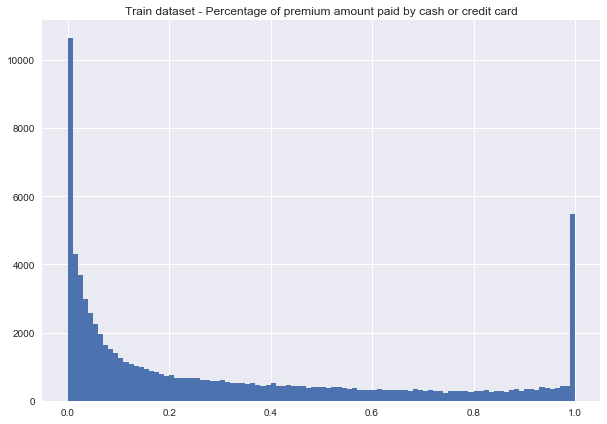

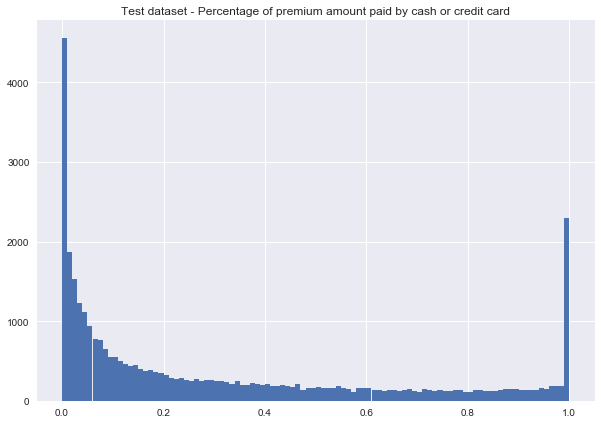

In [12]:
# Percentage of premium amount paid by cash or credit card variable distribution

train.hist(column='perc_premium_paid_by_cash_credit', bins=100, figsize=(10,7))
plt.title ('Train dataset - Percentage of premium amount paid by cash or credit card')

test.hist(column='perc_premium_paid_by_cash_credit', bins=100, figsize=(10,7))
plt.title ('Test dataset - Percentage of premium amount paid by cash or credit card')

plt.show()

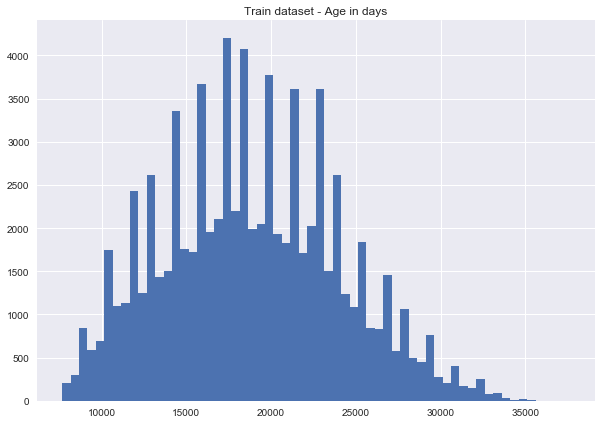

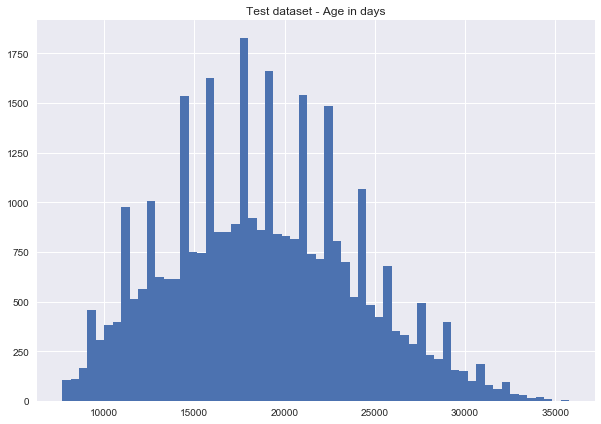

In [13]:
# Age distribution

train.hist(column='age_in_days', bins=60,  figsize=(10,7))
plt.title ('Train dataset - Age in days')

test.hist(column='age_in_days', bins=60,  figsize=(10,7))
plt.title ('Test dataset - Age in days')

plt.show()

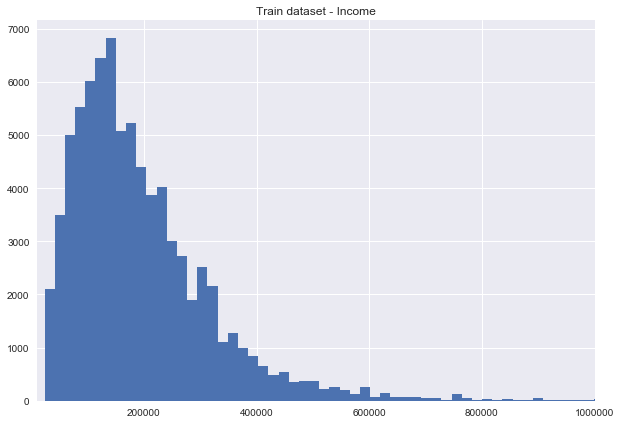

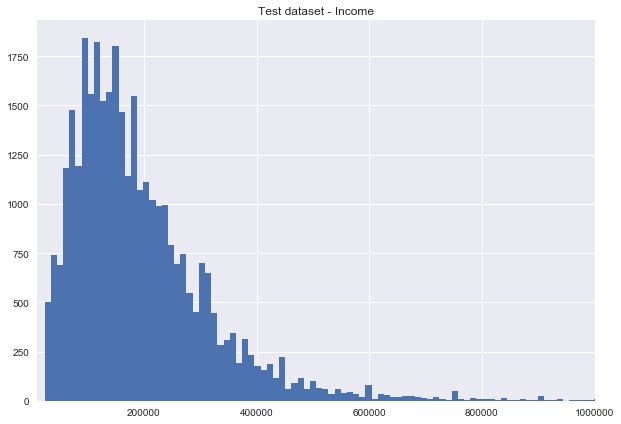

In [14]:
# Income distribution

train.hist(column='Income', bins=5000, figsize=(10,7))
plt.title ('Train dataset - Income')
plt.xlim(10000, 1000000)

test.hist(column='Income', bins=2000, figsize=(10,7))
plt.title ('Test dataset - Income')
plt.xlim(10000, 1000000)

plt.show()

Note: The income distribution have a range from 34,000 to 90 millions. 
For visualisation purpose, the x-axis of distribution graph is limited to 1 million.

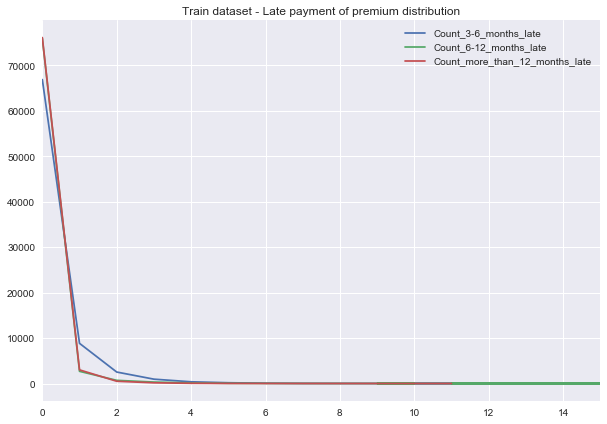

In [15]:
# Late payment of premium distribution

train['Count_3-6_months_late'].value_counts().plot(figsize=(10,7))
train['Count_6-12_months_late'].value_counts().plot(figsize=(10,7))
train['Count_more_than_12_months_late'].value_counts().plot(figsize=(10,7))
plt.title ('Train dataset - Late payment of premium distribution')
plt.legend(loc='upper right')

plt.show()

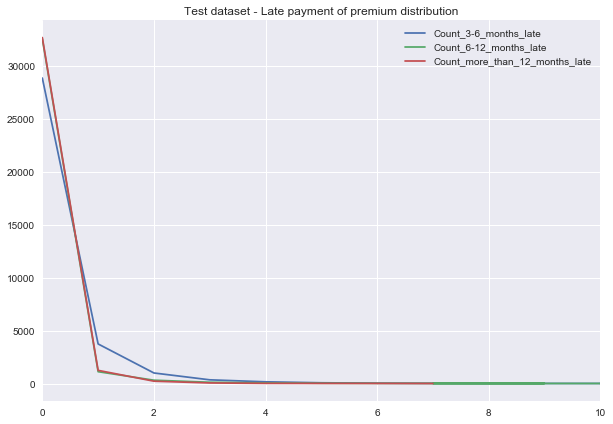

In [16]:
# Late payment of premium distribution

test['Count_3-6_months_late'].value_counts().plot(figsize=(10,7))
test['Count_6-12_months_late'].value_counts().plot(figsize=(10,7))
test['Count_more_than_12_months_late'].value_counts().plot(figsize=(10,7))
plt.title ('Test dataset - Late payment of premium distribution')
plt.legend(loc='upper right')

plt.show()

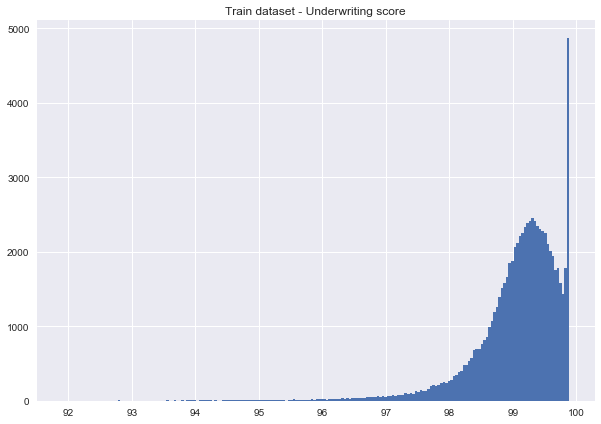

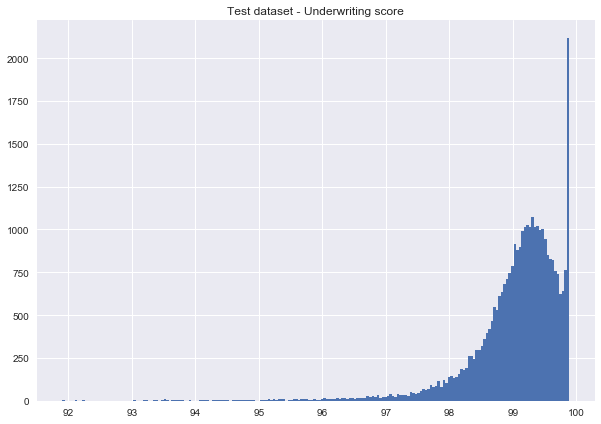

In [17]:
# Late payment of premium distribution 

train.hist(column='application_underwriting_score', bins=200, figsize=(10,7))
plt.title ('Train dataset - Underwriting score')

test.hist(column='application_underwriting_score', bins=200, figsize=(10,7))
plt.title ('Test dataset - Underwriting score')

plt.show()

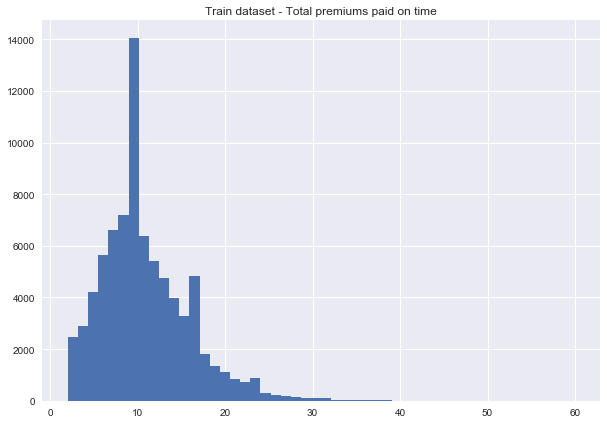

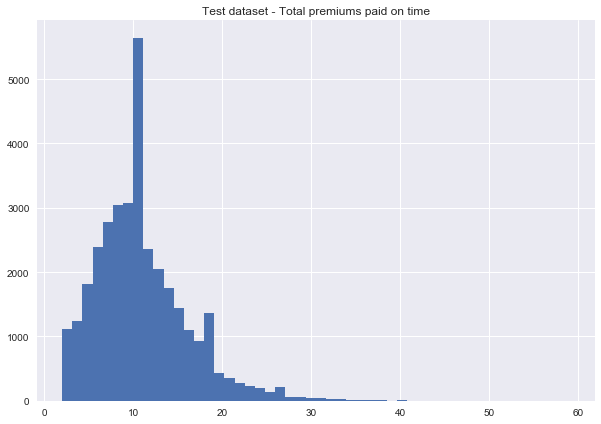

In [18]:
# Total premiums paid on time distribution

train.hist(column='no_of_premiums_paid', bins=50, figsize=(10,7))
plt.title ('Train dataset - Total premiums paid on time')

test.hist(column='no_of_premiums_paid', bins=50, figsize=(10,7))
plt.title ('Test dataset - Total premiums paid on time')

plt.show()

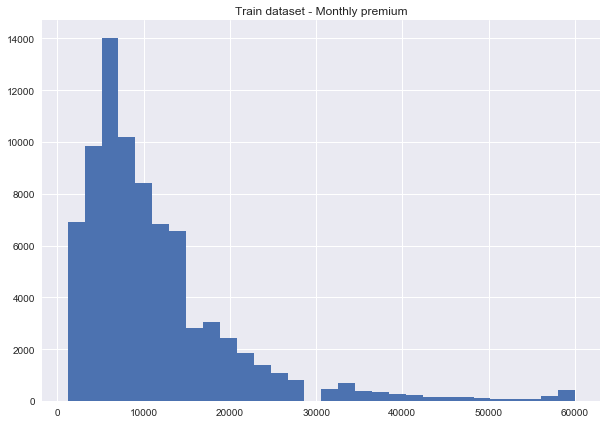

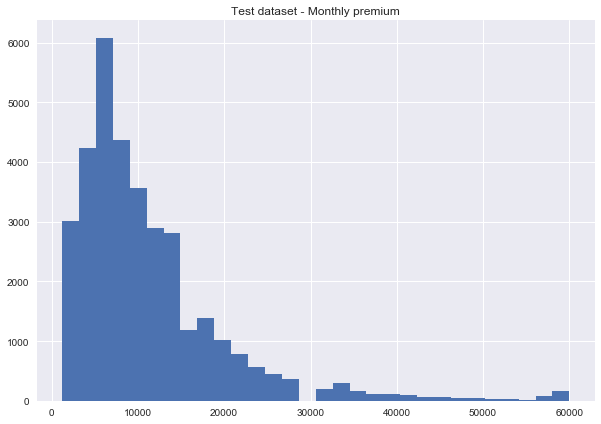

In [19]:
# Monthly premium distribution

train.hist(column='premium', bins=30, figsize=(10,7))
plt.title ('Train dataset - Monthly premium')

test.hist(column='premium', bins=30, figsize=(10,7))
plt.title ('Test dataset - Monthly premium')

plt.show()

Note: Both monthly premium distributions seems to have a gap at around 30,000 

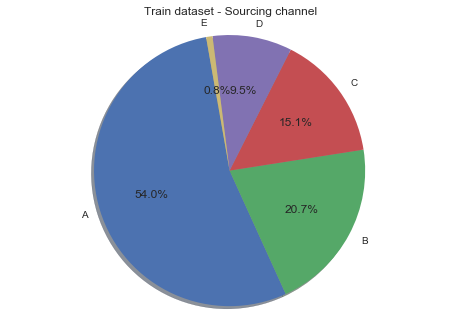

In [20]:
# Breakdown of Sourcing Channel
train['sourcing_channel'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Train dataset - Sourcing channel')
plt.axis('equal')
plt.ylabel('')
plt.show()

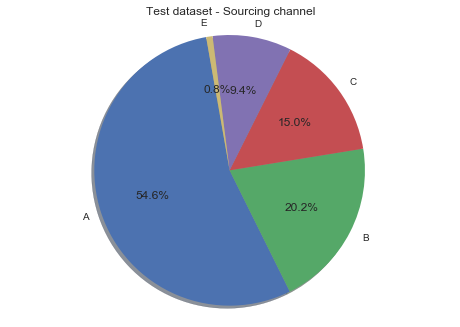

In [21]:
# Breakdown of Sourcing Channel
test['sourcing_channel'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Test dataset - Sourcing channel')
plt.axis('equal')
plt.ylabel('')
plt.show()

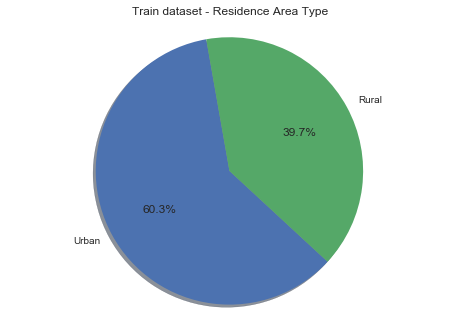

In [22]:
# Breakdown of residence area type
train['residence_area_type'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Train dataset - Residence Area Type')
plt.axis('equal')
plt.ylabel('')
plt.show()

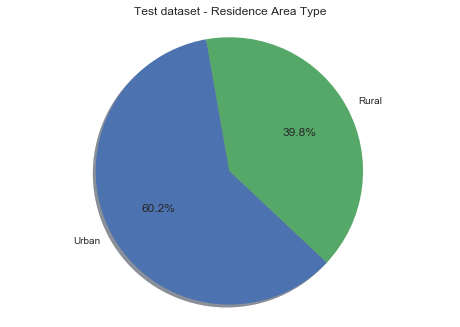

In [23]:
# Breakdown of residence area type
test['residence_area_type'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Test dataset - Residence Area Type')
plt.axis('equal')
plt.ylabel('')
plt.show()

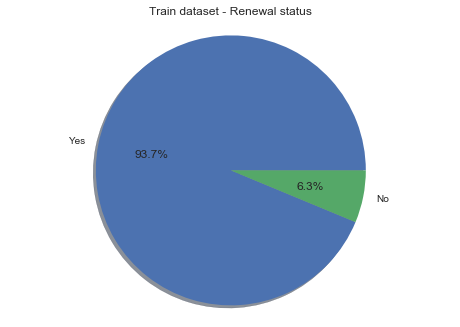

In [24]:
# Breakdown of renewal status 
temp = train['renewal'].value_counts(normalize = True)

labels = 'Yes', 'No'
sizes = temp.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Train dataset - Renewal status')
plt.axis('equal')
plt.show()

## Bivariate analysis  

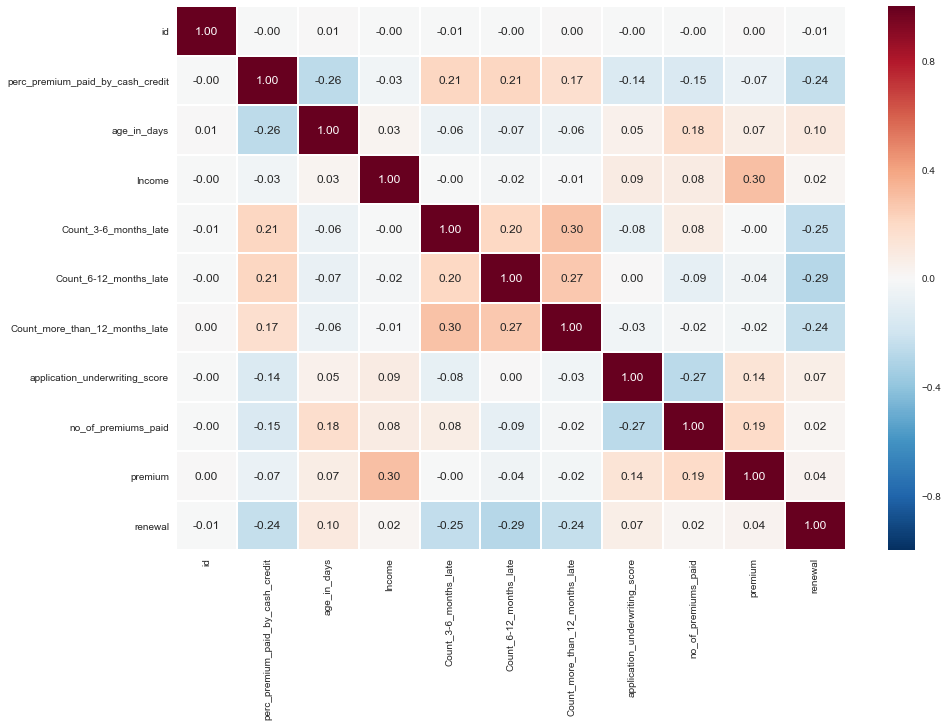

In [25]:
# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr(), annot=True, fmt=".2f", linewidths=1)

Few observations: 

- There is a positive correlation between the 3 variables for late premium payment 
- Late premium payments seem to be positively correlated with the percentage of premium paid by cash or credit
- However the correlations are negative between renewal, late premium payment records and percentage of premium paid by cash or credit
- The correlations between renewal, age and income are positive 
- Income, monthly premium and underwriting score are also positively correlated



In [26]:
# Function to create boxplot with descriptive analysis

def boxplot(variable):
    train.boxplot(column=variable, by='renewal', figsize=(10,7))
    plt.title('{} by renewal status'.format(variable))
    plt.xlabel('renewal')
    plt.ylabel(variable)
    plt.suptitle("")
    plt.show()
    
    print(train[variable].groupby(train['renewal']).describe())

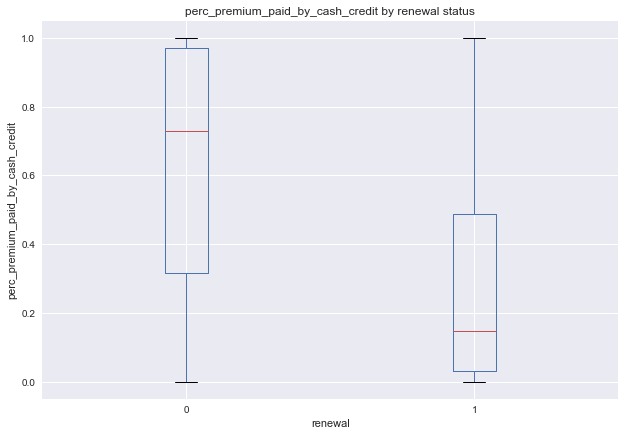

           count      mean       std  min    25%    50%    75%  max
renewal                                                            
0         4998.0  0.626626  0.352369  0.0  0.317  0.728  0.971  1.0
1        74855.0  0.293433  0.323140  0.0  0.031  0.148  0.487  1.0


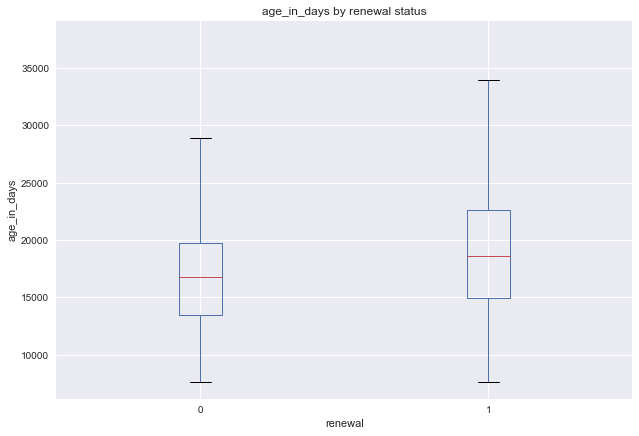

           count          mean          std     min      25%      50%  \
renewal                                                                 
0         4998.0  16929.642657  4659.581776  7671.0  13511.0  16800.5   
1        74855.0  18974.696867  5218.343105  7670.0  14978.0  18630.0   

             75%      max  
renewal                    
0        19725.0  36874.0  
1        22640.0  37602.0  


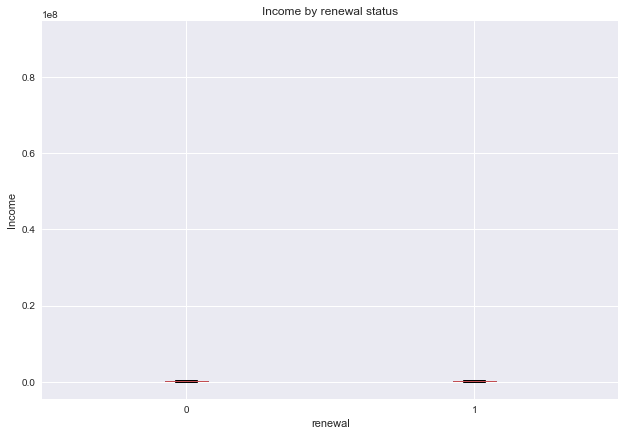

           count           mean            std      min       25%       50%  \
renewal                                                                       
0         4998.0  177058.799520  207754.301594  24030.0   90102.5  138100.0   
1        74855.0  210969.651727  510005.936457  24030.0  109130.0  168870.0   

              75%         max  
renewal                        
0        210725.0   7500070.0  
1        255050.0  90262600.0  


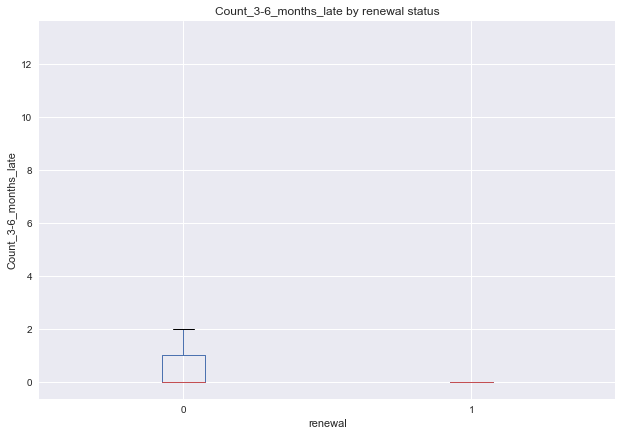

           count      mean       std  min  25%  50%  75%   max
renewal                                                       
0         4938.0  0.918591  1.337761  0.0  0.0  0.0  1.0  13.0
1        74818.0  0.204456  0.600015  0.0  0.0  0.0  0.0   9.0


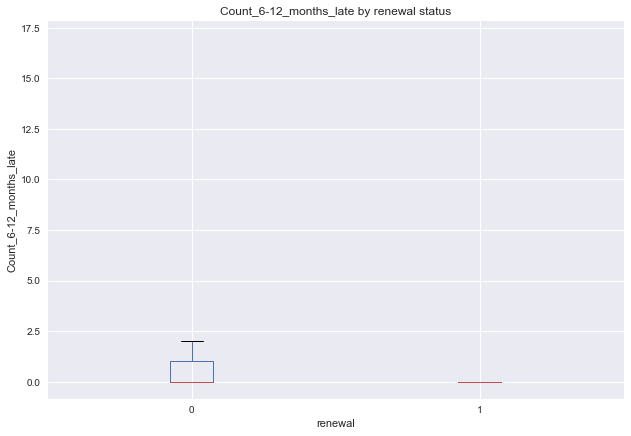

           count      mean       std  min  25%  50%  75%   max
renewal                                                       
0         4938.0  0.564399  1.151834  0.0  0.0  0.0  1.0  17.0
1        74818.0  0.046099  0.314539  0.0  0.0  0.0  0.0  15.0


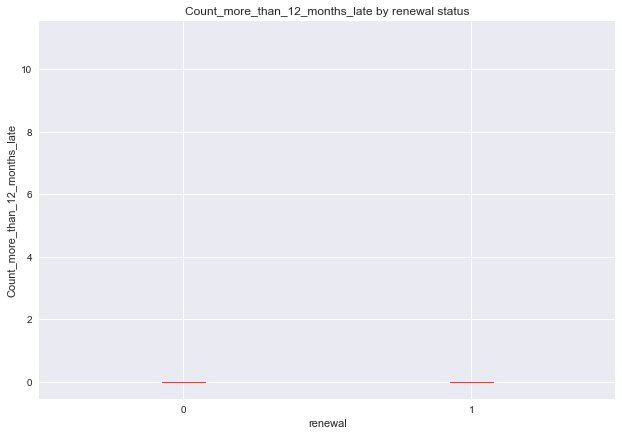

           count      mean       std  min  25%  50%  75%   max
renewal                                                       
0         4938.0  0.351964  0.766723  0.0  0.0  0.0  0.0  11.0
1        74818.0  0.040739  0.242889  0.0  0.0  0.0  0.0   8.0


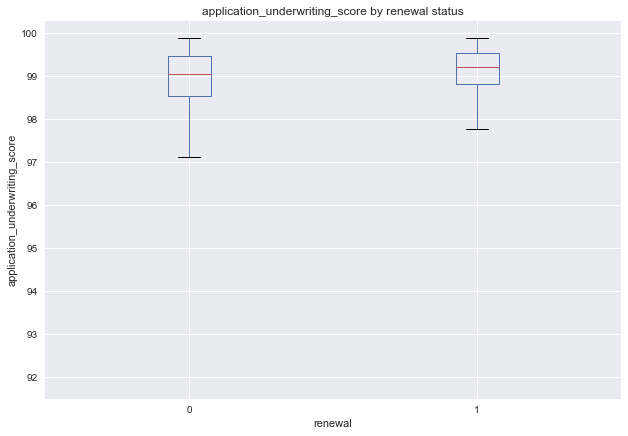

           count       mean       std    min    25%    50%    75%    max
renewal                                                                 
0         4798.0  98.870256  0.877734  92.24  98.53  99.05  99.48  99.89
1        72081.0  99.080407  0.727809  91.90  98.83  99.22  99.54  99.89


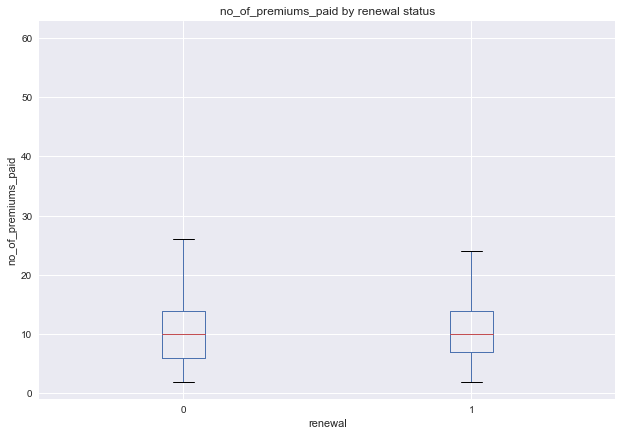

           count       mean       std  min  25%   50%   75%   max
renewal                                                          
0         4998.0  10.410364  5.784630  2.0  6.0  10.0  14.0  59.0
1        74855.0  10.894169  5.125691  2.0  7.0  10.0  14.0  60.0


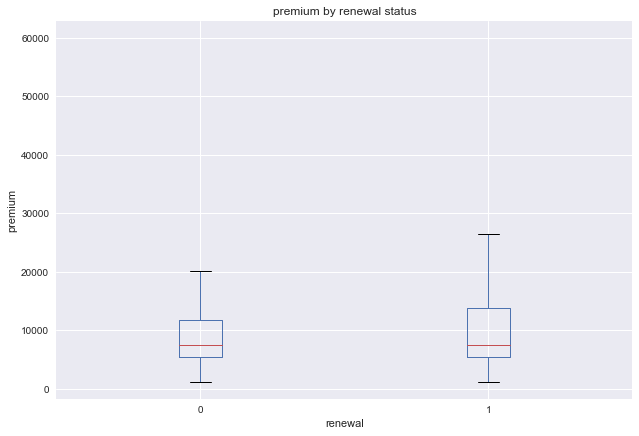

           count          mean          std     min     25%     50%      75%  \
renewal                                                                        
0         4998.0   9599.519808  8610.731129  1200.0  5400.0  7500.0  11700.0   
1        74855.0  11012.975753  9445.566438  1200.0  5400.0  7500.0  13800.0   

             max  
renewal           
0        60000.0  
1        60000.0  


In [27]:
# Define variables to be plotted with boxplot
Var = ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', \
       'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'premium']

for v in Var:
    boxplot(v)

Few observations:

For the group of client who did not renewed 
  - the mean of % premium paid by cash or credit is much higher than the other group 
  - there is more occurrence of late premium payments
  - the age, income and underwriting score means are slightly lower 
  - the mean for number of premium paid and monthly premium are relatively the same

In [28]:
# Cross-tabulation report by renewal status and sourcing channel
channel = pd.crosstab(train['sourcing_channel'], train['renewal'], normalize= True, margins=True)
print(channel)

renewal                  0         1       All
sourcing_channel                              
A                 0.029417  0.510751  0.540168
B                 0.013350  0.193430  0.206780
C                 0.011308  0.139456  0.150765
D                 0.007940  0.086722  0.094661
E                 0.000576  0.007050  0.007627
All               0.062590  0.937410  1.000000


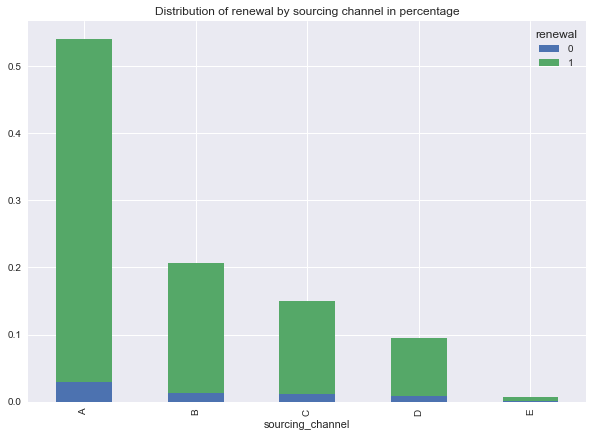

In [29]:
# Distribution chart with stacked column 
channel.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Distribution of renewal by sourcing channel in percentage')

plt.show()

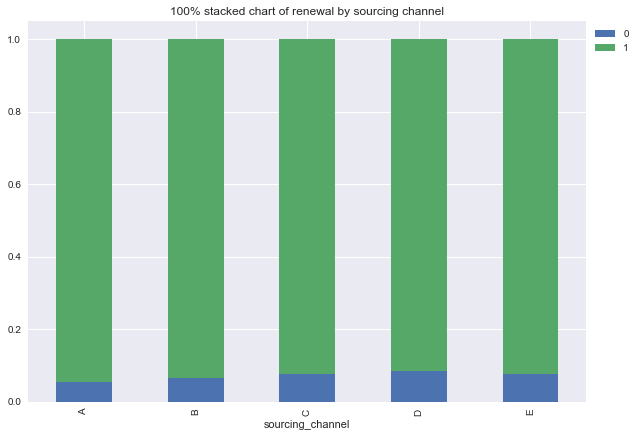

renewal                  0         1  All
sourcing_channel                         
A                 0.054458  0.945542  1.0
B                 0.064559  0.935441  1.0
C                 0.075006  0.924994  1.0
D                 0.083874  0.916126  1.0
E                 0.075534  0.924466  1.0
All               0.062590  0.937410  1.0


In [30]:
# Distribution chart with 100% stacked column 

def percConvert(x):
    return x/float(x[-1])

channel2 = channel.apply(percConvert, axis=1)
channel2.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10,7))
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('100% stacked chart of renewal by sourcing channel')
plt.show()

print(channel2)

In [31]:
# Cross-tabulation report by renewal status and sourcing channel
residence = pd.crosstab(train['residence_area_type'], train['renewal'], normalize= True, margins=True)
print (residence)

renewal                     0         1       All
residence_area_type                              
Rural                0.025021  0.371583  0.396604
Urban                0.037569  0.565827  0.603396
All                  0.062590  0.937410  1.000000


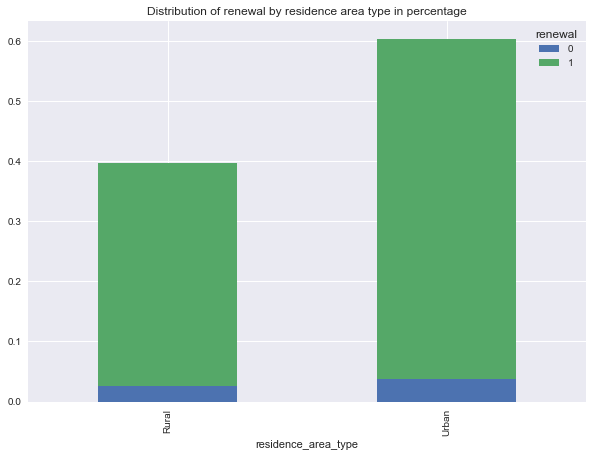

In [32]:
# Distribution chart with stacked column 
residence.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Distribution of renewal by residence area type in percentage')
plt.show()

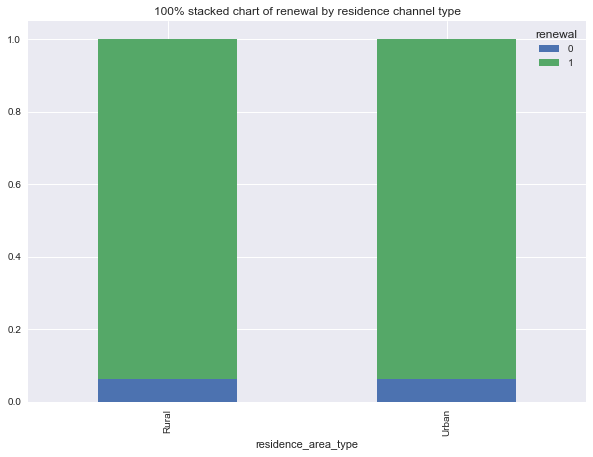

renewal                     0         1  All
residence_area_type                         
Rural                0.063088  0.936912  1.0
Urban                0.062263  0.937737  1.0
All                  0.062590  0.937410  1.0


In [33]:
# Distribution chart with 100% stacked column 

residence2 = residence.apply(percConvert, axis=1)
residence2.iloc[:-1,:-1].plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('100% stacked chart of renewal by residence channel type')
plt.show()

print(residence2)


## Treating Categorical Values 

We use OneHotEncoder to transform categorical variables into dummies.

In [34]:
train_clean = train.copy()
test_clean = test.copy()

In [35]:
# Transform categorical values into dummies values
sourcing_channel_train=pd.get_dummies(train_clean['sourcing_channel']) 
sourcing_channel_test=pd.get_dummies(test_clean['sourcing_channel']) 
residence_area_type_train=pd.get_dummies(train_clean['residence_area_type']) 
residence_area_type_test=pd.get_dummies(test_clean['residence_area_type']) 

In [36]:
# Remove categorical values columns
train_clean.drop(['sourcing_channel','residence_area_type'], axis=1, inplace=True)
test_clean.drop(['sourcing_channel','residence_area_type'], axis=1, inplace=True)

In [37]:
# Concatenate the dummies values columns to the datasets
train_clean = pd.concat([train_clean,sourcing_channel_train,residence_area_type_train],axis=1) 
test_clean = pd.concat([test_clean,sourcing_channel_test,residence_area_type_test],axis=1) 

In [38]:
# Check the data head
train_clean.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,A,B,C,D,E,Rural,Urban
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3300,1,0,0,1,0,0,0,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,18000,1,1,0,0,0,0,0,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3300,0,0,0,1,0,0,1,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,9600,1,1,0,0,0,0,0,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,9600,1,0,1,0,0,0,0,1


In [39]:
# Check sourcing channel and residence type data types
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 18 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
premium                             79853 non-null int64
renewal                             79853 non-null int64
A                                   79853 non-null uint8
B                                   79853 non-null uint8
C                                   79853 non-null uint8
D                                   79853 non-null uint8
E                         

In [40]:
# Export pre-processed dataset to separate files
train_clean.to_csv('train_clean.csv', index=False)
test_clean.to_csv('test_clean.csv', index=False)

# Predictive Modeling using XGBoost Algorithm

We use XGBoost Algorithm for the prediction exercise. 

Of note, XGBoost handles internally missing values by allocating them to whichever side reduces the loss the most, that is why we do not perform missing value imputation here. 

The codes and parameters choices are adapted from Analytics Vidhya guideline on the XGBoost model
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [54]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split

In [55]:
train1 = pd.read_csv('train_clean.csv')
test1 = pd.read_csv('test_clean.csv')

In [56]:
# XGBoost model

def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['renewal'].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['renewal'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['renewal'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['renewal'], dtrain_predprob))
    
    #Predict on testing data:
    dtest['renewal'] = alg.predict_proba(dtest[predictors])[:,1]

    # Feature Importance Score            
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)#
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

C:\Users\linat\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.942
AUC Score (Train): 0.857138


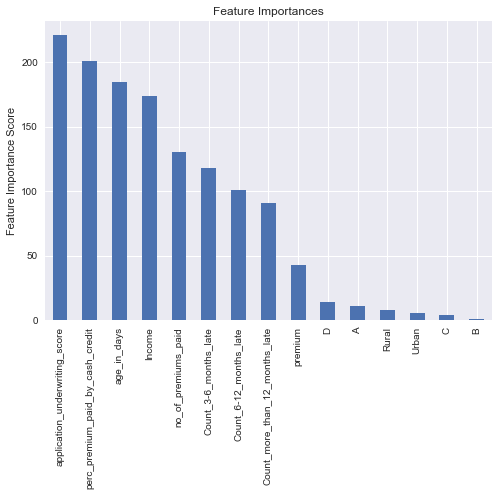

In [57]:
# Define parameters for the XGBoost Model 

predictors = [x for x in train1.columns if x not in ['renewal', 'id']]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=8,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train1, test1, predictors)

In [58]:
test1.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,A,B,C,D,E,Rural,Urban,renewal
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,3300,1,0,0,0,0,1,0,0.992552
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,11700,1,0,0,0,0,0,1,0.981791
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,11700,0,1,0,0,0,0,1,0.853962
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,5400,0,1,0,0,0,1,0,0.975552
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,9600,1,0,0,0,0,1,0,0.957981


# Incentives

To calcutate the policy incentive, we will use an iterative method to find the "optimal" incentive to maximise each policy's net revenue.

In [59]:
# Function of the policy's expected net revenue

def f(x, p, premium):
    return premium*p*(1+0.2*(1-np.exp(-(10*(1-np.exp(-x/400)))/5)))-x

In [60]:
# Iterative method to find the "optimal" incentive to maximise each policy's net revenue

def findoptimal (p, premium):
    revenue = 0
    i = 0
    for x in range (0, 3000):
        r = f(x,p,premium)
        if (r > revenue).all():
            revenue = r
            i = x
        else:
            incentive.append(i)
            break

In [61]:
# Calculate the optimal incentive based on the calculated renewal probability and monthly premium

incentive = []
for index, row in test1.iterrows():
    findoptimal(row['renewal'], row['premium'] )


In [62]:
# Add the incentives column to the database
test1['incentives']= incentive

In [63]:
# Drop columns to keep only id, renewal and incentives  
test1.drop(test1.iloc[:, 1:17], inplace=True, axis=1)

In [64]:
test1.tail()

,id,renewal,incentives
34219,81988,0.973336,271
34220,30326,0.983645,23
34221,65749,0.956660,19
34222,65686,0.758663,420
34223,93826,0.962155,268


In [65]:
test1.to_csv('submission11.csv', index=False)